In [89]:
import numpy as np
import requests
import pandas as pd
import time

## When using PushShift.io, read the documentation and set your variables accordingly.¶

#### 1. Get 25 recent submissions from the /r/DataIsBeautiful subreddit

In [51]:
# pushshift params
params = {
    "subreddit" : 'dataisbeautiful',
    "size" : 1000,
}

In [99]:
post_url = 'https://api.pushshift.io/reddit/submission/search'

In [53]:
# Usual requests.get method

res = requests.get(post_url, params)

In [55]:
res.status_code

200

In [56]:
res.json().keys()

dict_keys(['data'])

In [57]:
pd.DataFrame(res.json()['data']).shape

(100, 76)

In [61]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        25 non-null     object
 1   selftext     25 non-null     object
 2   score        25 non-null     int64 
 3   created_utc  25 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 928.0+ bytes


In [62]:
# res.json()['data'][0]

In [63]:
# pd.DataFrame(res.json()['data'])

In [67]:
# control flow for above 

res = requests.get(post_url, params)

if res.status_code == 200:
    posts_df = pd.DataFrame(res.json()['data'])
else:
    print(res.status_code)

In [68]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  100 non-null    object 
 1   allow_live_comments            100 non-null    bool   
 2   author                         100 non-null    object 
 3   author_flair_css_class         23 non-null     object 
 4   author_flair_richtext          100 non-null    object 
 5   author_flair_text              23 non-null     object 
 6   author_flair_type              100 non-null    object 
 7   author_fullname                100 non-null    object 
 8   author_patreon_flair           100 non-null    bool   
 9   author_premium                 100 non-null    bool   
 10  awarders                       100 non-null    object 
 11  can_mod_post                   100 non-null    bool   
 12  contest_mode                   100 non-null    bool

In [69]:
posts_df = posts_df[['title', 'selftext', 'score', 'created_utc']]

In [70]:
posts_df.head()

,title,selftext,score,created_utc
0,همه چیز در باره ی ریمل سی سی (mascara c c ),,1,1608653174
1,"Mumbai club raid: Suresh Raina, Guru Randhawa,...",,1,1608653123
2,A visualization I made showing which companies...,,1,1608653112
3,[OC] Tracking My VA Disability Process (after ...,,1,1608652451
4,My VA Disability Appeal Tracking(after 12 year...,,1,1608652131


In [71]:
comment_url = 'https://api.pushshift.io/reddit/comment/search'

In [72]:
# same as above, but for comments

res = requests.get(comment_url, params)

if res.status_code == 200:
    comments_df = pd.DataFrame(res.json()['data'])
else:
    print(res.status_code)

In [73]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   all_awardings                    100 non-null    object
 1   associated_award                 0 non-null      object
 2   author                           100 non-null    object
 3   author_flair_background_color    6 non-null      object
 4   author_flair_css_class           13 non-null     object
 5   author_flair_richtext            94 non-null     object
 6   author_flair_template_id         13 non-null     object
 7   author_flair_text                13 non-null     object
 8   author_flair_text_color          19 non-null     object
 9   author_flair_type                94 non-null     object
 10  author_fullname                  94 non-null     object
 11  author_patreon_flair             94 non-null     object
 12  author_premium                   94 n

In [74]:
comments_df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags
0,[],None,dataisbeautiful-bot,None,ocmaker,[],1c7d62a6-099d-11e7-9b3c-0ee50bfd7a4c,OC: ∞,dark,text,...,/r/dataisbeautiful/comments/khvftm/oc_22_month...,1608653707,1,True,True,dataisbeautiful,t5_2tk95,None,0,[]
1,[],None,dataisbeautiful-bot,None,ocmaker,[],1c7d62a6-099d-11e7-9b3c-0ee50bfd7a4c,OC: ∞,dark,text,...,/r/dataisbeautiful/comments/khx5my/oc_i_record...,1608653706,1,True,True,dataisbeautiful,t5_2tk95,None,0,[]
2,[],None,twintig5,None,None,[],None,None,None,text,...,/r/dataisbeautiful/comments/ki6kpf/oc_physical...,1608653687,1,True,False,dataisbeautiful,t5_2tk95,None,0,[]
3,[],None,isezno,None,None,[],None,None,None,text,...,/r/dataisbeautiful/comments/ki4y5v/oc_world_ma...,1608653667,1,True,False,dataisbeautiful,t5_2tk95,None,0,[]
4,[],None,miscellaneousSock,None,None,[],None,None,None,text,...,/r/dataisbeautiful/comments/ki6kpf/oc_physical...,1608653648,1,True,False,dataisbeautiful,t5_2tk95,None,0,[]


In [75]:
comments_df[['body','created_utc']]

,body,created_utc
0,Thank you for your [Original Content](https://...,1608653512
1,Thank you for your [Original Content](https://...,1608653510
2,"Nope, Steph is the same hight/weight like D-Ro...",1608653492
3,These figures are wildly distorted. Netherland...,1608653474
4,Can you put ryan secrest on this for scale?,1608653456
...,...,...
95,You let the kid cry when they wake up at night...,1608651661
96,I'm not sure I'd call inflation fetish'd Europ...,1608651627
97,Looking at the dates wondering why this only c...,1608651575
98,Same. It’s quicker.,1608651554


#### 2. Fetch 500 recent submissions from /r/DataSets & Combine the title and selftext to merge the title and post content into one field¶

In [76]:
posts_df['created_utc'].max()

1608653174

In [77]:
posts_df['created_utc'].min()

1608563600

In [78]:
# just one example of a loop for pulling in subreddits
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 10
subreddit = 'datasets'
params = {
    'subreddit': subreddit,
    'size': 100,
}
start_time = time.time()
for i in range(loops):
    current_time = time.time()
    #requesting data
    try:
        res = requests.get(url, params)
        print(f'res {i+1} code: ', res.status_code)
        data = res.json()
        posts = data['data']
        dfs.append(pd.DataFrame(posts))
        #get oldest post time and use as before parameter in next request
        oldest = posts['created_utc'].min()
        params['before'] = oldest
        #sleep for 1 second
        time.sleep(1)
    except:
        pass
reddit_posts = pd.concat(dfs)
#filename = subreddit + '.csv'
#reddit_posts.to_csv('./datasets/' + filename, index=False)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  200
res 10 code:  200


In [79]:
reddit_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  1000 non-null   object 
 1   allow_live_comments            1000 non-null   bool   
 2   author                         1000 non-null   object 
 3   author_flair_css_class         20 non-null     object 
 4   author_flair_richtext          990 non-null    object 
 5   author_flair_text              40 non-null     object 
 6   author_flair_type              990 non-null    object 
 7   author_fullname                990 non-null    object 
 8   author_patreon_flair           990 non-null    object 
 9   author_premium                 990 non-null    object 
 10  awarders                       1000 non-null   object 
 11  can_mod_post                   1000 non-null   bool   
 12  contest_mode                   1000 non-null   boo

In [80]:
base_url = 'https://api.pushshift.io/reddit/submission/search'

params = {
    "subreddit": "relationship_advice",
    "size":100
    
}

In [81]:
res2 = requests.get(base_url,params)
res2.status_code

200

In [82]:
datasets_df = pd.DataFrame(res2.json()['data'])

In [83]:
datasets_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,author_flair_template_id,author_flair_text_color
0,[],False,ThrowRA9954678,None,[],None,text,t2_9g9onr0n,False,False,...,0,[],1.0,https://www.reddit.com/r/relationship_advice/c...,all_ads,6,NaN,NaN,NaN,NaN
1,[],False,edwardjonesadams,None,[],None,text,t2_xtyqe,False,False,...,0,[],1.0,https://www.reddit.com/r/relationship_advice/c...,all_ads,6,NaN,NaN,NaN,NaN
2,[],False,Responsible-Bird-234,None,[],None,text,t2_7wmgaqu6,False,False,...,0,[],1.0,https://www.reddit.com/r/relationship_advice/c...,all_ads,6,NaN,NaN,NaN,NaN
3,[],False,Throwra00351,None,[],None,text,t2_9fzx59u7,False,False,...,0,[],1.0,https://www.reddit.com/r/relationship_advice/c...,all_ads,6,NaN,NaN,NaN,NaN
4,[],False,ThroeRA_tarzan,None,[],None,text,t2_9g70pek1,False,False,...,0,[],1.0,https://www.reddit.com/r/relationship_advice/c...,all_ads,6,NaN,NaN,NaN,NaN


In [84]:
datasets_df[['title', 'selftext', 'created_utc']]

,title,selftext,created_utc
0,Am I overreacting to his lack of help?,[removed],1608654075
1,My (26) gf (23) was upset that I wouldn’t fini...,[removed],1608654022
2,I've fallen in love in a wrong timing and I'm ...,So the life that I planned for was something t...,1608654016
3,My girlfriend wants to bring me to America so ...,Hi. I am from South Korea. Here the adult age ...,1608653954
4,Am I in a toxic relationship?,Me (24M) and my gf (24F) have been in a relati...,1608653882
...,...,...,...
95,Is it normal for me (19M) to feel like my crus...,[removed],1608649998
96,My (38m) wife (37f) bought me an uncomfortable...,"2020 has forced me to be a remote employee, so...",1608649904
97,I wish that I had Jessie’s girl. Where do I fi...,"Jessie is a friend. Yeah, I know, he's been a ...",1608649853
98,Does this message from this chick I’ve been se...,So me and this chick have hooked up a few time...,1608649832


In [86]:
datasets_df.created_utc.max()

1608654075

In [87]:
datasets_df.created_utc.min()

1608649746

In [91]:
# converting UTC to datetime
pd.to_datetime(datasets_df['created_utc'], unit='s')

0    2020-12-22 16:21:15
1    2020-12-22 16:20:22
2    2020-12-22 16:20:16
3    2020-12-22 16:19:14
4    2020-12-22 16:18:02
             ...        
95   2020-12-22 15:13:18
96   2020-12-22 15:11:44
97   2020-12-22 15:10:53
98   2020-12-22 15:10:32
99   2020-12-22 15:09:06
Name: created_utc, Length: 100, dtype: datetime64[ns]

In [92]:
datasets_df['datetime'] = pd.to_datetime(datasets_df['created_utc'], unit='s')

In [93]:
datasets_df[['title', 'selftext', 'datetime']].head()

,title,selftext,datetime
0,Am I overreacting to his lack of help?,[removed],2020-12-22 16:21:15
1,My (26) gf (23) was upset that I wouldn’t fini...,[removed],2020-12-22 16:20:22
2,I've fallen in love in a wrong timing and I'm ...,So the life that I planned for was something t...,2020-12-22 16:20:16
3,My girlfriend wants to bring me to America so ...,Hi. I am from South Korea. Here the adult age ...,2020-12-22 16:19:14
4,Am I in a toxic relationship?,Me (24M) and my gf (24F) have been in a relati...,2020-12-22 16:18:02


In [94]:
datasets_df['merged'] = datasets_df['title'] + " " + datasets_df['selftext']

In [95]:
datasets_df['title'].map(lambda x: len(x)).max()

203

In [96]:
# 5 longest posts
datasets_df['selftext'].map(lambda x: len(x)).nlargest()

89    9709
74    8983
43    8818
76    7850
18    5814
Name: selftext, dtype: int64

In [97]:
datasets_df['selftext'].map(lambda x: len(x)).mean()

1763.54

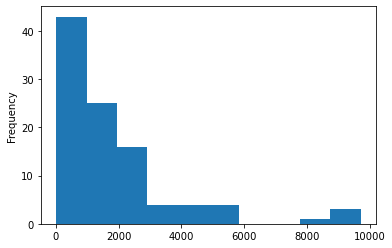

In [98]:
#distribution of post length

datasets_df['selftext'].map(lambda x: len(x)).plot(kind='hist');